# Preliminary Visualization of Data

## Adapting example code for M6ASP

From example at: https://gist.github.com/adcroft/2a2b91d66625fd534372

We will use matplotlib.pyplot for plotting and scipy's netcdf package for reading the model output. The `%pylab inline` causes figures to appear in the page and conveniently alias pyplot to `plt` (which is becoming a widely used alias).

This analysis assumes you changed DAYMAX to some multiple of 5 so that there are multiple time records in the model output.

In [2]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We first create a netcdf object, or "handle", to the netcdf file. We'll also list all the objects in the netcdf object. `prof_file.variables` displays all the variables as an ordered dictionary. We see the respective variables in the "example_o1/ocean.0001-0010.ssh.cdl" meta data file (I locally downloaded the example files to the same directory on my machine). The meta data file also contains attributes of the variables that can be called.

For example, the float ssh is a three-dimensional vector with dimentions, time, yh, and xh:

        float ssh(time, yh, xh) ;
		ssh:long_name = "Sea Surface Height" ;
		ssh:units = "m" ;
		ssh:missing_value = -1.e+34f ;
		ssh:_FillValue = -1.e+34f ;
		ssh:cell_measures = "area: area_t" ;
		ssh:cell_methods = "area:mean yh:mean xh:mean time: mean" ;
		ssh:time_avg_info = "average_T1,average_T2,average_DT" ;

In [3]:
prog_file = scipy.io.netcdf_file('example_o1/ocean.0001-0010.ssh.nc')
prog_file.variables

OrderedDict([('nv', <scipy.io.netcdf.netcdf_variable at 0x111dbd390>),
             ('ssh', <scipy.io.netcdf.netcdf_variable at 0x114f95990>),
             ('time', <scipy.io.netcdf.netcdf_variable at 0x114f95950>),
             ('time_bnds', <scipy.io.netcdf.netcdf_variable at 0x114f959d0>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x114f95ad0>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x114f95bd0>),
             ('average_T1', <scipy.io.netcdf.netcdf_variable at 0x114f95cd0>),
             ('average_T2', <scipy.io.netcdf.netcdf_variable at 0x114f95d90>),
             ('average_DT', <scipy.io.netcdf.netcdf_variable at 0x114f95e90>)])

Now we will create a variable object for the "time" variable in the file. Again, I'm labelling it as a handle to distinguish it from a numpy array or raw data.

We'll also look at an "attribute" and print the shape of the data.

In [4]:
time_handle = prog_file.variables['time']
print('Description =', time_handle.long_name)
print('Shape =',time_handle.shape)

('Description =', 'time')
('Shape =', (10,))


We see that "time" has one attribute: time. From the shape, we see that it is a one-dimensional vector that represents the time in "days since 0001-01-01 00:00:00" according to the .cdl file. We do the same for the ssh variable as we want to visualize data about sea surface height.

In [5]:
ssh_handle = prog_file.variables['ssh']
print('Description =', ssh_handle.long_name)
print('Cell methods =', ssh_handle.cell_methods)
print('Shape =',ssh_handle.shape)

# apparently cell_methods is a string
# print type(ssh_handle.cell_methods)

('Description =', 'Sea Surface Height')
('Cell methods =', 'area:mean yh:mean xh:mean time: mean')
('Shape =', (10, 320, 360))


On the example, the data is in 4 dimensions (time-, vertical-, meridional-, zonal-axes). We only had time and x, y coordinates.

>Missing values- map --> use netcdf4 to mask the missing values

In [81]:
# print(ssh_handle[0].shape)
# print(ssh_handle[0])
# ma: masked array, create a masked array from a slice
# also grids- the continents don't look right
# masked = numpy.ma.masked_where[ssh_handle[0] == ssh_handle.missing_value, ssh_handle[0])

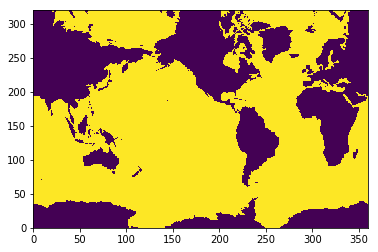

In [75]:
plt.pcolormesh( ssh_handle[0] )

When we plot with `ssh_handle[0]`, we see that the plot has colored the continents purple. The reason why it is doing so is because `ssh_handle[0]` has missing values that correspond to nonexistent sea surface height values for land. To account for this, we will create a masked array that handles these missing values with the helper function below.

In [76]:
# helper function for masking arrays with missing values
def maskArray(handle, index):
    return numpy.ma.array(handle[index], mask=(handle[index] == handle.missing_value))

In [77]:
print type(ssh_handle.missing_value)
print ssh_handle[0]
masked = maskArray(ssh_handle, 0)

<type 'numpy.float32'>
[[-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
 [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
 [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
 ...
 [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
 [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]
 [-1.e+34 -1.e+34 -1.e+34 ... -1.e+34 -1.e+34 -1.e+34]]


After having created our masked array, we will plot again. This time, we see that the continents are no longer being colored.

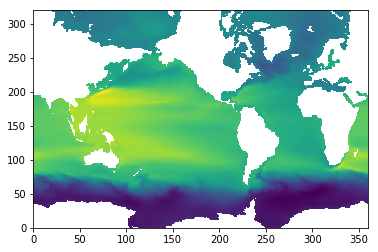

In [25]:
# plt.pcolormesh( ssh_handle[0] );
plt.pcolormesh( masked )

After plotting the data with `pcolormesh`, we will add a scale and change the colormap. We will also suppress the "`<matplotlib...>`" by using a semicolon.

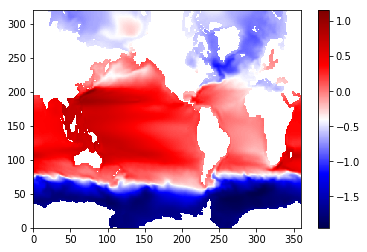

In [80]:
# plt.pcolormesh( ssh_handle[0], cmap=cm.seismic ); plt.colorbar();
plt.pcolormesh( masked, cmap=cm.seismic ); plt.colorbar();

This changes the coloring to what was specified by `cmap=cm.seismic`. As with the example, we are currently also looking at 4D data being projected onto a 2D medium. We follow the tutorial. One thing to note, the map is not accurately depicted. For example, we see that the size of Australia in this map is off. In order to fix the discrepancy between the land/ocean areas, we will need to fix the grids with which the map is being displayed.

### something with compatibility between netcdf4 and other versions here?

In [31]:
import ipywidgets

In [42]:
# [ssh_handle[0].min(), ssh_handle[0].max()]
[masked.min(), masked.max()]

[-1.9465954, 1.1518394]

We use the function below to plot the data. We pass in the masked array to plot accordingly.

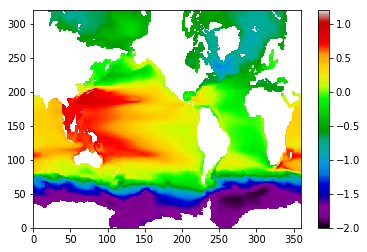

In [83]:
def plot_ssh(data):
#     plt.pcolormesh( ssh_handle[record], cmap=cm.spectral )
    plt.pcolormesh( data, cmap=cm.spectral )
    plt.clim(-2,1.2) # Fixed scale here based on above output
    plt.colorbar()

# ipywidgets.interact(plot_ssh, record=(0,ssh_handle.shape[0]-1));
ipywidgets.interact(plot_ssh(masked));

We use a loop to redraw the plot. We iterate through each time slice in `ssh_handle.shape[0]`, and we mask each corresponding 2-d array to redraw the map so that we can see the changes between each time step.

In [85]:
from IPython import display
# print masked.shape
# print ssh_handle.shape

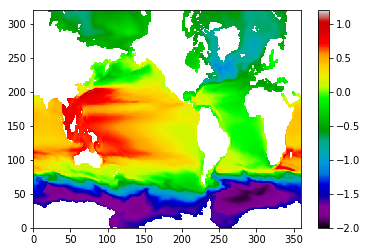

In [82]:
for n in range( ssh_handle.shape[0] ):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(maskArray(ssh_handle, n))
    display.clear_output(wait=True)